In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
medical = pd.read_csv('medical_examination.csv')

In [10]:
medical

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.93,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.47,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.35,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.10,1


In [9]:
# Add 'bmi' and 'overweight' columns

bmi = medical['weight'] / (medical['height'] / 100) ** 2

medical['bmi'] = bmi.round(2)

overweight_true_filter = bmi > 25

overweight_false_filter = bmi <= 25

medical['overweight'] = None

medical.loc[overweight_true_filter, 'overweight'] = 1

medical.loc[overweight_false_filter, 'overweight'] = 0

In [12]:
# Normalize data
# Make 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

medical.loc[:, 'cholesterol'] = medical['cholesterol'].map({1: 0, 2: 1, 3: 1})
medical.loc[:, 'gluc'].replace({1: 0, 2: 1, 3: 1}, inplace=True)

print(medical['cholesterol'].value_counts(normalize=True))
medical['gluc'].value_counts(normalize=True)


0    0.748357
1    0.251643
Name: cholesterol, dtype: float64


0    0.8497
1    0.1503
Name: gluc, dtype: float64

## FIGURE 1 - categorical plot

In [19]:
# Draw Categorical Plot
def draw_cat_plot():
    
    # Create DataFrame for cat plot using `pd.melt` using just the values 
    # from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = None


    # Group and reformat the data to split it by 'cardio'. 
    # Show the counts of each feature. 
    # You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = None

    # Draw the catplot with 'sns.catplot()'



    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [15]:
subjective_features = ['smoke', 'alco', 'active']

In [16]:
examination_features = ['cholesterol', 'gluc', 'overweight']

In [17]:
target = 'cardio'

In [19]:
features = medical.loc[:, subjective_features + examination_features + [target]]
features

,smoke,alco,active,cholesterol,gluc,overweight,cardio
0,0,0,1,0,0,0,0
1,0,0,1,1,0,1,1
2,0,0,0,1,0,0,1
3,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
69995,1,0,1,0,0,1,0
69996,0,0,1,1,1,1,1
69997,0,1,0,1,0,1,1
69998,0,0,0,0,1,1,1


In [20]:
melted = pd.melt(features, id_vars='cardio')
melted

,cardio,variable,value
0,0,smoke,0
1,1,smoke,0
2,1,smoke,0
3,1,smoke,0
4,0,smoke,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [59]:
# melted_0 = melted.loc[(melted.cardio == 0), :]
# melted_0

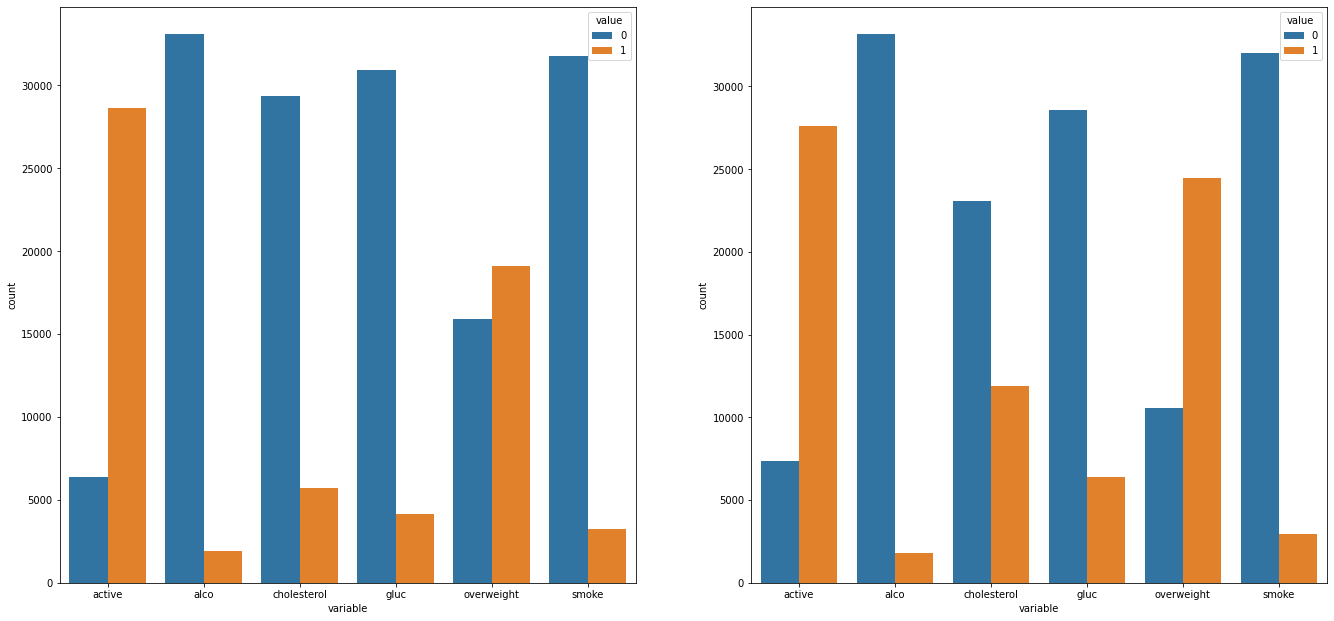

In [67]:
# sns.catplot(x=melted_0.variable.values, y=melted_0.value.values)
# sns.catplot(x=melted_0.variable, y=melted_0.value, data=melted_0)
# sns.catplot(x=melted_0.variable, y=melted_0.value, data=melted_0, kind='bar')

# 1
# sns.catplot(x='variable', hue='value', data=melted_0, kind='count')

# 2
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_axes([0, 0, 0.5, 1])
ax2 = fig.add_axes([0.6, 0, 0.5, 1])

cols = sorted(list(features.drop('cardio', axis=1).columns))
# sns.catplot(x='variable', hue='value', data=melted[melted.cardio == 0],
#             ax=ax1, 
#             kind='count', 
#             hue_order=(0, 1), 
#             order=cols)
sns.countplot(x='variable', hue='value', data=melted[melted.cardio == 0],
            ax=ax1,  
            hue_order=(0, 1), 
            order=cols)
sns.countplot(x='variable', hue='value', data=melted[melted.cardio == 1],
            ax=ax2,  
            hue_order=(0, 1), 
            order=cols)

In [56]:
features.drop('cardio', axis=1).columns

Index(['smoke', 'alco', 'active', 'cholesterol', 'gluc', 'overweight'], dtype='object')

In [45]:
melt_gr = melt.groupby(['cardio', 'variable'])
melt_gr

In [14]:
melt_gr.value_counts()

NameError: name 'melt_gr' is not defined

```filt = features.cardio == 0
zero = features.loc[filt, :]
zero
```

## Group by 'cardio'

In [21]:
cardio_gr = features.groupby(['cardio'])
cardio_gr

In [22]:
cardio_0 = cardio_gr.get_group(0)
cardio_0

,smoke,alco,active,cholesterol,gluc,overweight,cardio
0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,1,1,1,0
6,0,0,1,1,0,1,0
8,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
69987,0,0,1,0,0,0,0
69988,0,0,1,0,0,0,0
69991,0,0,1,1,1,1,0
69995,1,0,1,0,0,1,0


In [23]:
cardio_1 = cardio_gr.get_group(1)
cardio_1

,smoke,alco,active,cholesterol,gluc,overweight,cardio
1,0,0,1,1,0,1,1
2,0,0,0,1,0,0,1
3,0,0,1,0,0,1,1
7,0,0,1,1,1,1,1
15,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...
69993,0,0,1,0,0,0,1
69994,0,0,1,0,0,1,1
69996,0,0,1,1,1,1,1
69997,0,1,0,1,0,1,1


## Melt

In [24]:
melt_0 = pd.melt(cardio_0.drop(columns=['cardio']))
melt_0

,variable,value
0,smoke,0
1,smoke,0
2,smoke,0
3,smoke,0
4,smoke,0
...,...,...
210121,overweight,0
210122,overweight,0
210123,overweight,1
210124,overweight,1


In [25]:
melt_1 = pd.melt(cardio_1.drop(columns=['cardio']))
melt_1

,variable,value
0,smoke,0
1,smoke,0
2,smoke,0
3,smoke,0
4,smoke,0
...,...,...
209869,overweight,0
209870,overweight,1
209871,overweight,1
209872,overweight,1


## Aggregation

**group by variable applying count (value count)  
or  
group by variable and value**

In [26]:
agg_0 = melt_0.groupby(['variable', 'value'])
agg_0

In [27]:
agg_0.agg(pd.Series.mean)

value
variable    value       
active      0        0.0
            1        1.0
alco        0        0.0
            1        1.0
cholesterol 0        0.0
            1        1.0
gluc        0        0.0
            1        1.0
overweight  0        0.0
            1        1.0
smoke       0        0.0
            1        1.0

In [28]:
agg_0.agg(len)

variable     value
active       0         6378
             1        28643
alco         0        33080
             1         1941
cholesterol  0        29330
             1         5691
gluc         0        30894
             1         4127
overweight   0        15915
             1        19106
smoke        0        31781
             1         3240
dtype: int64

<AxesSubplot:xlabel='variable,value'>

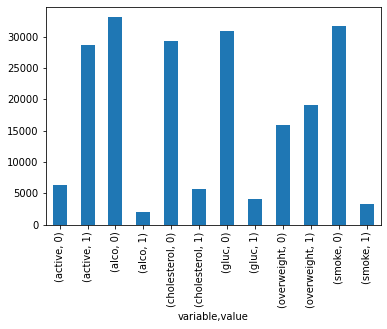

In [29]:
data_fig1 = agg_0.agg(len)
data_fig1.plot(kind='bar')

In [30]:
agg_0 = melt_0.groupby('variable')
agg_0

In [31]:
agg_0.agg(len)

,value
variable,
active,35021
alco,35021
cholesterol,35021
gluc,35021
overweight,35021
smoke,35021


In [32]:
melt_groups_0 = melt_0.groupby(['variable'])
melt_groups_0

In [33]:
melt_groups_0.get_group('smoke')

,variable,value
0,smoke,0
1,smoke,0
2,smoke,0
3,smoke,0
4,smoke,0
...,...,...
35016,smoke,0
35017,smoke,0
35018,smoke,0
35019,smoke,1


In [34]:
x = melt_groups_0.get_group('smoke')['value'].value_counts()
x

0    31781
1     3240
Name: value, dtype: int64

In [35]:
melt_groups_0.count()

,value
variable,
active,35021
alco,35021
cholesterol,35021
gluc,35021
overweight,35021
smoke,35021


ValueError: Input data must be a pandas object to reorder

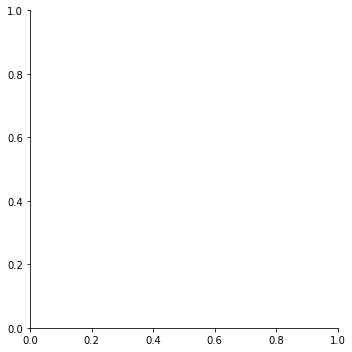

In [36]:
sns.catplot(data=x)

In [37]:
df_cat = pd.melt(subj_exam_features)
df_cat

NameError: name 'subj_exam_features' is not defined

In [38]:
fs = df_cat['variable'] == 'smoke'
fs

NameError: name 'df_cat' is not defined

In [39]:
df_cat.loc[fs]

NameError: name 'df_cat' is not defined

In [ ]:
a = [[10,20,30], [10,50,44], [90,20,80]]

In [ ]:
b = ['v1', 'v2', 'v3']

In [ ]:
d = dict(zip(b, a))
d

In [ ]:
dff = pd.DataFrame(d)
dff

In [ ]:
# sns.catplot(a, b)